In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

## Data cleaning

### Loading the raw dataset
- There were some ***non ascii character*** in the raw dataset, so we used **unicode_escape** to load the data

In [2]:
# data = pd.read_csv("data/nba-hall-of-fame.csv", encoding = 'unicode_escape')
# print(data.shape)
# data.head()

### Removing the garbage column

In [3]:
# data = data.iloc[:, :-5]
# data = data.iloc[:, 1:]

### Saving the updated dataframe as csv

In [4]:
# data.to_csv("nba-hall-of-fame.csv", index = None, header=True)

### As a result of using unicode_escape, we have some unicode character in the name column. So we had to clean that up manually.

## Working with the filtered dataset

In [5]:
start_time = time.time()
data = pd.read_csv("data/nba-hall-of-fame.csv")
print(data.shape)
data.head()

(200, 13)


,year,name,games,points,total_rebounds,assists,steals,blocks,field_goal,3_point_field_goal,free_throw,win_shares,win_shares_per_48_mins
0,1995,Kareem Abdul-Jabbar,1560.0,24.6,11.2,3.6,0.9,2.6,0.559,0.056,0.721,273.4,0.228
1,2018,Ray Allen,1300.0,18.9,4.1,3.4,1.1,0.2,0.452,0.400,0.894,145.1,0.150
2,1991,Tiny Archibald,876.0,18.8,2.3,7.4,1.1,0.1,0.467,0.224,0.810,83.4,0.128
3,1978,Paul Arizin,713.0,22.8,8.6,2.3,NaN,NaN,0.421,NaN,0.810,108.8,0.183
4,2006,Charles Barkley,1073.0,22.1,11.7,3.9,1.5,0.8,0.541,0.266,0.735,177.2,0.216


In [6]:
data.dtypes

year                        int64
name                       object
games                     float64
points                    float64
total_rebounds            float64
assists                   float64
steals                    float64
blocks                    float64
field_goal                float64
3_point_field_goal        float64
free_throw                float64
win_shares                float64
win_shares_per_48_mins    float64
dtype: object

In [7]:
data.isnull().any()

year                      False
name                      False
games                      True
points                     True
total_rebounds             True
assists                    True
steals                     True
blocks                     True
field_goal                 True
3_point_field_goal         True
free_throw                 True
win_shares                 True
win_shares_per_48_mins     True
dtype: bool

- As we can see, there is null value in all the columns except year and name

### How many players have been awarded hall-of-fame each year?

In [11]:
awardedGroupByYear = data.groupby('year')['name'].count().reset_index(name='count')
awardedGroupByYear.head()

,year,count
0,1959,4
1,1960,5
2,1961,7
3,1962,4
4,1963,1


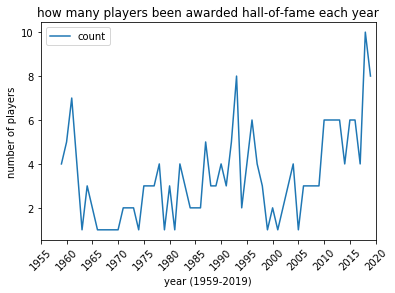

In [9]:
awardedGroupByYear.plot('year', 'count')
plt.xticks(np.arange(1955, 2025, step=5), rotation=45)
plt.xlabel("year (1959-2019)")
plt.ylabel("number of players")
plt.title("how many players been awarded hall-of-fame each year")
plt.show()

In [10]:
print("It took %s seconds to process" % (time.time() - start_time))

It took 0.21143412590026855 seconds to process
